In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Datos históricos de Vista Oil Gas (VIST).csv to Datos históricos de Vista Oil Gas (VIST).csv


In [3]:
df = pd.read_csv('Datos históricos de Vista Oil Gas (VIST).csv')

In [4]:
df

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,21.11.2025,"48,210","49,500","49,540","47,320","885,01K","-3,43%"
1,20.11.2025,"49,920","51,350","52,100","49,800","1,05M","-2,27%"
2,19.11.2025,"51,080","49,210","51,150","48,680","1,12M","2,28%"
3,18.11.2025,"49,940","48,250","50,400","47,710","964,37K","1,86%"
4,17.11.2025,"49,030","49,050","49,840","48,530","745,47K","0,39%"
...,...,...,...,...,...,...,...
1477,08.01.2020,"7,930","7,910","8,050","7,700","72,33K","-0,88%"
1478,07.01.2020,"8,000","8,070","8,190","7,780","149,54K","-0,99%"
1479,06.01.2020,"8,080","8,220","8,340","8,050","43,59K","-1,46%"
1480,03.01.2020,"8,200","8,120","8,320","8,120","83,86K","1,86%"


**Limpieza**

---



In [5]:
#elimino apertura, maximo,minimo
df.drop('Apertura', axis=1, inplace=True)
df.drop('Máximo', axis=1, inplace=True)
df.drop('Mínimo', axis=1, inplace=True)


In [6]:
#paso a formato fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

/tmp/ipython-input-466427461.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha'] = pd.to_datetime(df['Fecha'])


In [7]:
#verifico  si tiene nulos
df.isna().sum()

,0
Fecha,0
Último,0
Vol.,0
% var.,0


In [8]:
#paso a float la columna var%
df['% var.'] = df['% var.'].str.replace('%', '', regex=False).str.replace(',','.',regex=False).astype(float)

In [9]:
#funcion para formatear  numros de la columna vol(volumen)
def convertir_vol(x):
    x = str(x).strip()
    x = x.replace(',', '.')   # pasar coma a punto

    if x.endswith('M'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('K'):
        return float(x[:-1]) * 1_000
    elif x == '-' or x == '':
        return None
    else:
        return float(x)

In [10]:
#convierto la columna vol(volumen)
df['Vol.'] = df['Vol.'].apply(convertir_vol)

In [11]:
df

,Fecha,Último,Vol.,% var.
0,2025-11-21,"48,210",885010.0,-3.43
1,2025-11-20,"49,920",1050000.0,-2.27
2,2025-11-19,"51,080",1120000.0,2.28
3,2025-11-18,"49,940",964370.0,1.86
4,2025-11-17,"49,030",745470.0,0.39
...,...,...,...,...
1477,2020-01-08,"7,930",72330.0,-0.88
1478,2020-01-07,"8,000",149540.0,-0.99
1479,2020-01-06,"8,080",43590.0,-1.46
1480,2020-01-03,"8,200",83860.0,1.86


In [12]:
#paso a float la columna ultimo
df['Último']=df['Último'].str.replace(',','.',regex=False).astype(float)


In [13]:
#renombro la columna ultimo a precio
df.rename(columns={'Último':'Precio'},inplace=True)

**Analisis**

---



**¿Cómo se movió el precio de la acción de VIST ?**


---






In [14]:
#filtro  por  fecha
filtro_por_año = df[df['Fecha'] >= "2024-11-20"]


In [15]:
#precio maximo
filtro_por_año['Precio'].max()

59.5

In [16]:
#precio minimo
filtro_por_año['Precio'].min()

33.7

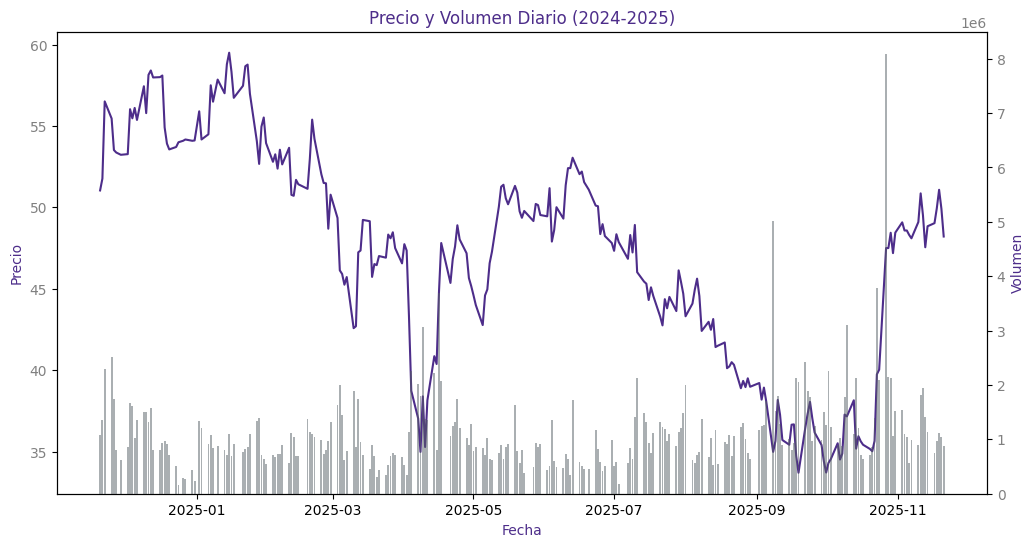

In [17]:
#grafico
fix, ax1 = plt.subplots(figsize=(12, 6 ))

#precio
ax1.plot(filtro_por_año['Fecha'], filtro_por_año['Precio'], color='#4D2D8A',  label='Precio')

ax1.set_xlabel('Fecha', color='#4D2D8A')
ax1.set_ylabel('Precio', color='#4D2D8A')
ax1.tick_params(axis='y', labelcolor='gray')

#volumen
ax2 = ax1.twinx()
ax2.bar(filtro_por_año['Fecha'], filtro_por_año['Vol.'], color='#576066', alpha=0.5, label='Volumen')
ax2.set_ylabel('Volumen', color='#4D2D8A')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title('Precio y Volumen Diario (2024-2025)', color='#4D2D8A')

plt.show()

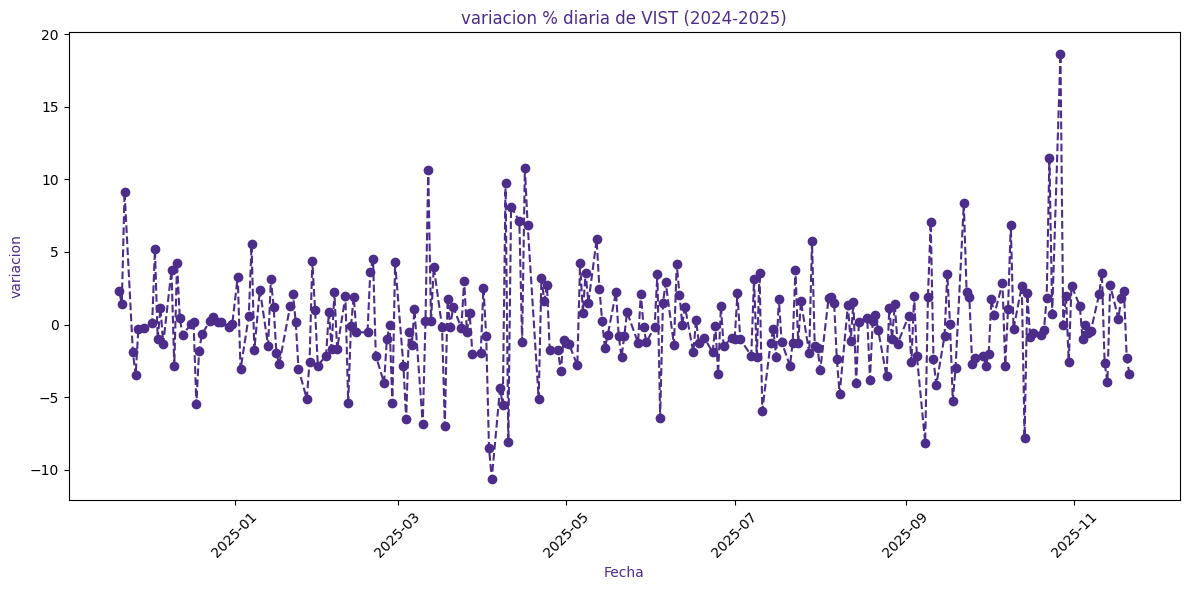

In [18]:
#grafico
fig, ax= plt.subplots(figsize=(12, 6))

ax.plot(filtro_por_año['Fecha'], filtro_por_año['% var.'], linestyle='dashed', marker='o', color= '#4D2D8A')
ax.set_title('variacion % diaria de VIST (2024-2025)',  color= '#4D2D8A')
ax.set_xlabel('Fecha', color= '#4D2D8A')
ax.set_ylabel('variacion', color= '#4D2D8A')

ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

In [19]:
#variacion minima
filtro_por_año['% var.'].min()

-10.62

In [20]:
#variacion maxima
filtro_por_año['% var.'].max()

18.66

In [21]:
#
#
#

**Correlacion mensual precio vs volumen**

---





In [22]:
df_Corr_filtro = df[df['Fecha'] >= "2023-11-11"]

In [23]:
# Agrupamos por mes y calculamos correlación entre precio y volumen
Correlacion_mensual = df_Corr_filtro.groupby(df_Corr_filtro['Fecha'].dt.to_period('M')).apply(lambda x: x['Precio'].corr(x['Vol.']))


In [24]:
Correlacion_mensual

,0
Fecha,
2023-11,0.355502
2023-12,0.294053
2024-01,-0.253456
2024-02,0.499083
2024-03,0.153348
2024-04,0.121811
2024-05,0.422151
2024-06,-0.053469
2024-07,0.233551


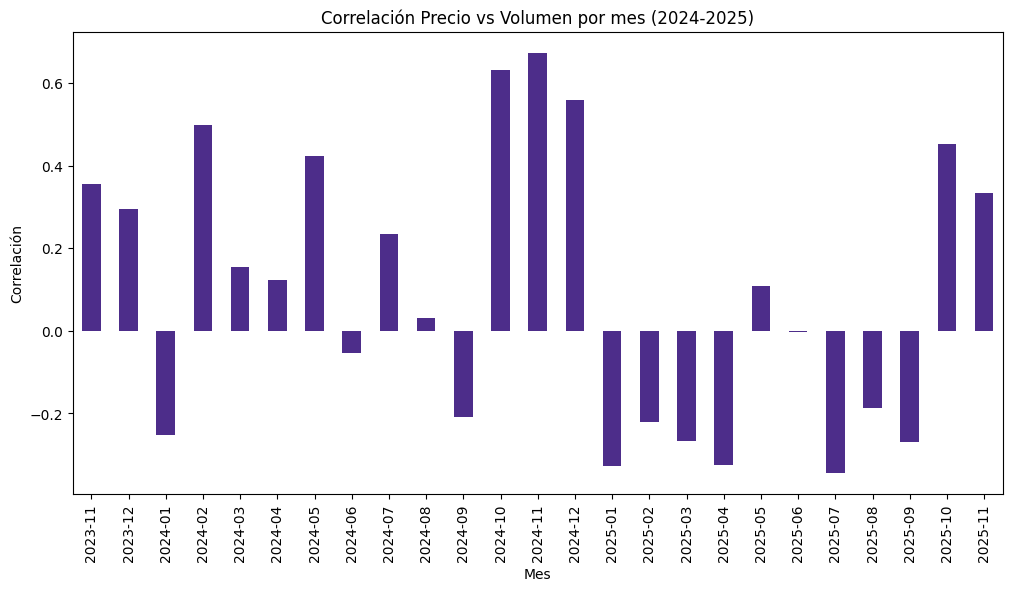

In [25]:
#grafico
Correlacion_mensual.plot(kind='bar', figsize=(12,6), color='#4D2D8A')
plt.title('Correlación Precio vs Volumen por mes (2024-2025)')
plt.ylabel('Correlación')

plt.xlabel('Mes')
plt.show()

In [26]:
#
#
#

**uso df_corr_filtro para hacer un scatter y ver la Relación visual entre Precio y Volumen**

---



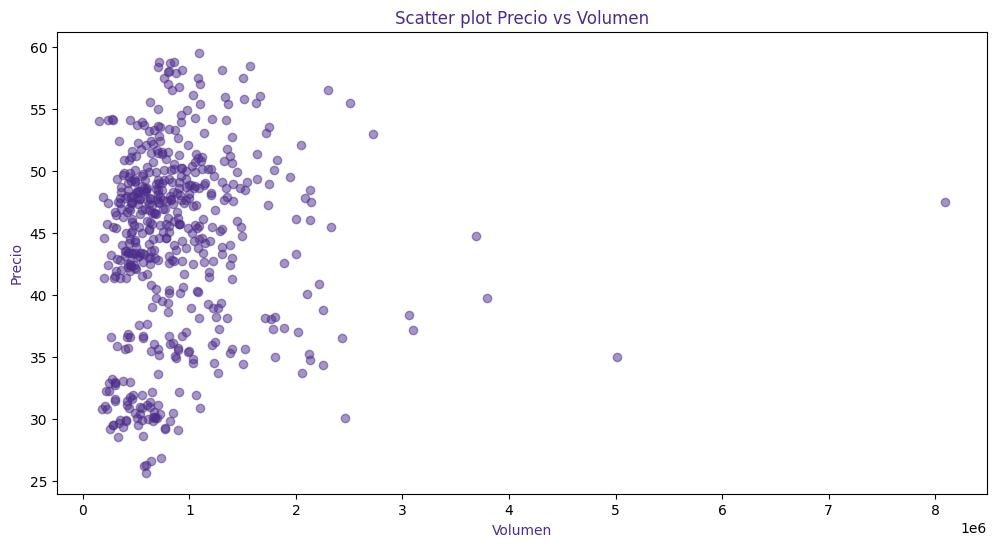

In [27]:
#grafico
plt.figure(figsize=(12, 6))

plt.scatter(df_Corr_filtro['Vol.'], df_Corr_filtro['Precio'], alpha= 0.5,  color= '#4D2D8A')
plt.title('Scatter plot Precio vs Volumen', color= '#4D2D8A')
plt.xlabel('Volumen', color= '#4D2D8A')
plt.ylabel('Precio', color= '#4D2D8A')
plt.show()

In [28]:
#grafico Interactivo
import plotly.express as px


# df tiene que tener columnas: Fecha, Ultimo, Vol_numerico
fig = px.scatter(df_Corr_filtro, x='Vol.', y='Precio',
                 hover_data=['Fecha'],
                 title='VIST - Precio vs Volumen (pasá el mouse!)',
                 width=1000, height=600)

fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()

In [29]:
#
#
#








**El heatmap de rendimiento mensual**



---









Lo que vos tenías originalmente en tu gráfico de “variación diaria” era la columna % var. diaria, es decir, cuánto cambió el precio cada día respecto al día anterior. Ese gráfico es una serie temporal diaria, donde cada punto es un día.

Cuando hacemos un heatmap mensual, no podemos poner cada día porque un heatmap no funciona con tanta granularidad de fechas. Lo que hacemos es:

Agrupar por mes y año.

Sacar un promedio de la variación diaria de ese mes (o cualquier otra estadística que quieras: mediana, máximo, etc.).

Eso nos da un solo número por mes, que es lo que se coloca en el heatmap.

Así que en realidad, no estás graficando días individuales, sino el promedio de la variación diaria de cada mes, para poder ver patrones mensuales a lo largo de los años.

In [30]:
# Crear columnas año y mes

df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

In [31]:
# Agrupamos por Año y Mes, obtenemos promedio de la variacion mensual

var_mensual = df.groupby(['Año', 'Mes'])['% var.'].mean().reset_index()


In [32]:
var_mensual

,Año,Mes,% var.
0,2020,1,-0.402381
1,2020,2,-0.630526
2,2020,3,-4.389545
3,2020,4,2.009048
4,2020,5,0.310500
...,...,...,...
66,2025,7,-0.270909
67,2025,8,-0.628095
68,2025,9,-0.520000
69,2025,10,1.618696


In [43]:
# Pivotar
Heatmap_data = var_mensual.pivot(index='Año', columns='Mes', values='% var.')




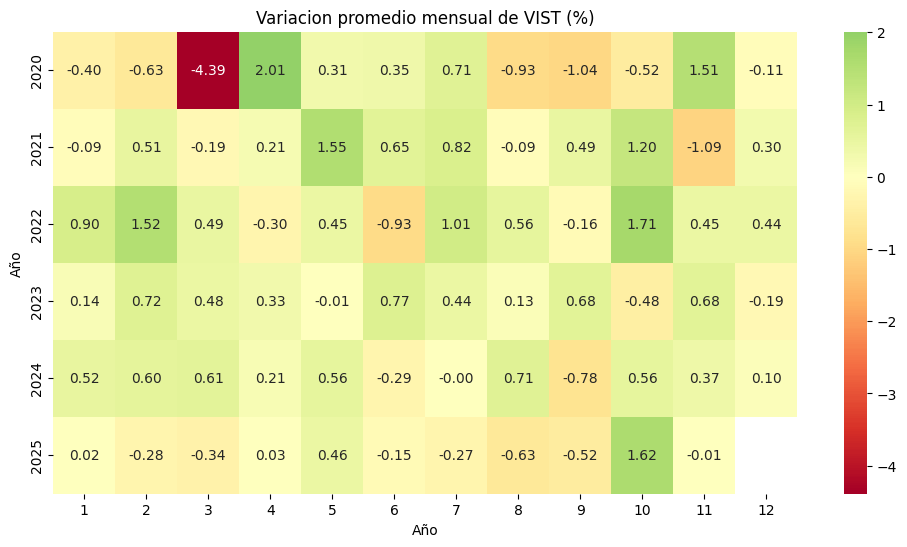

In [44]:
#grafico


plt.figure(figsize=(12,6))

sns.heatmap(Heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title("Variacion promedio mensual de VIST (%)")
plt.xlabel('Mes')
plt.xlabel('Año')
plt.show()


In [45]:
Heatmap_data

Mes,1,2,3,4,5,6,7,8,9,10,11,12
Año,,,,,,,,,,,,
2020,-0.402381,-0.630526,-4.389545,2.009048,0.310500,0.352273,0.705455,-0.930952,-1.037143,-0.521818,1.508500,-0.114545
2021,-0.093158,0.511053,-0.191304,0.210000,1.549500,0.649545,0.823810,-0.092727,0.486190,1.195238,-1.086667,0.305000
2022,0.896000,1.519474,0.491739,-0.302500,0.453810,-0.934286,1.007000,0.556087,-0.157619,1.713810,0.451429,0.444286
2023,0.143500,0.715263,0.478261,0.326316,-0.009091,0.767619,0.442000,0.133043,0.682500,-0.475455,0.680476,-0.188500
2024,0.521429,0.602000,0.610500,0.207273,0.560000,-0.290526,-0.004545,0.705000,-0.782500,0.564783,0.369000,0.102857
2025,0.025000,-0.277368,-0.341905,0.032857,0.463333,-0.148000,-0.270909,-0.628095,-0.520000,1.618696,-0.008000,NaN


In [36]:
#
#
#

** % de Retorno anual **

---






In [37]:
# Ordenamos por fecha (por las dudas)
df= df.sort_values('Fecha')

Retorno = df.groupby(df['Fecha'].dt.year)['Precio'].agg(['first', 'last'])

#Retorno.colums = ['Precio_apertura_año', 'Precio_cierre_año' ]

Retorno = Retorno.rename(columns= { 'first': 'Precio_apertura_año',
    'last': 'Precio_cierre_año'})

#Calculamos retorno anual %
Retorno['retorno_anual_%'] = (Retorno['Precio_cierre_año'] / Retorno['Precio_apertura_año'] - 1) * 100




In [38]:
Retorno

,Precio_apertura_año,Precio_cierre_año,retorno_anual_%
Fecha,,,
2020,8.05,2.56,-68.198758
2021,2.52,5.33,111.507937
2022,5.36,15.66,192.164179
2023,14.37,29.51,105.358386
2024,28.51,54.11,89.793055
2025,55.90,48.21,-13.756708


In [39]:
año_retorno = Retorno.index
porcentajes = Retorno['retorno_anual_%']

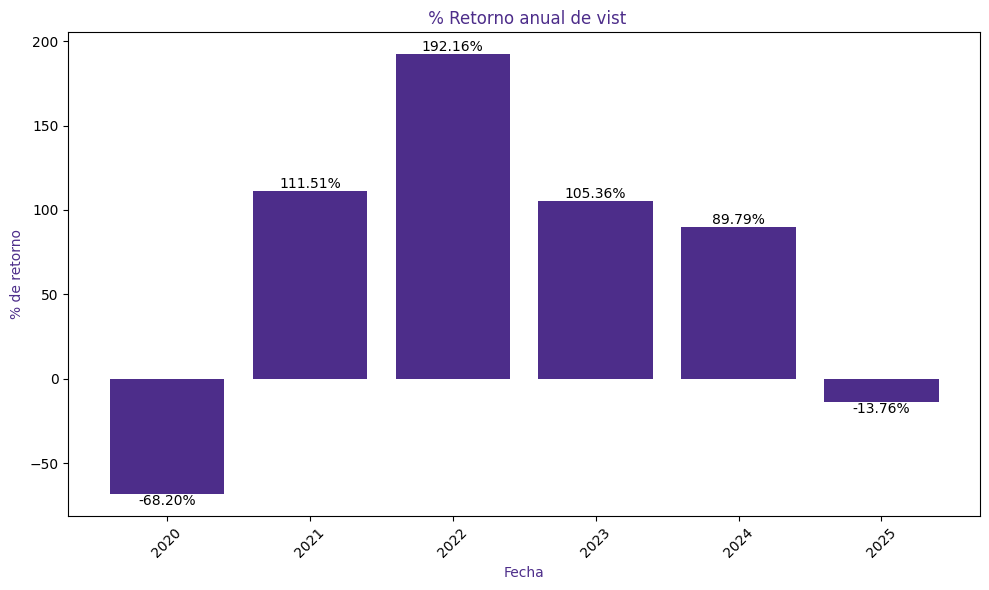

In [40]:
#grafico

fix, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(año_retorno, porcentajes,  color= '#4D2D8A')
ax.set_title(' % Retorno anual de vist',color= '#4D2D8A')
ax.set_xlabel('Fecha', color= '#4D2D8A')
ax.set_ylabel('% de retorno', color= '#4D2D8A')

ax.tick_params(axis='x', labelrotation=45)

ax.bar_label(bar, labels=[f"{v:.2f}%" for v in porcentajes])

plt.tight_layout()

plt.show()